In [15]:
import pandas as pd

listings = pd.read_csv(
    r"C:\Users\sibon\Downloads\Listings.csv",
    encoding="ISO-8859-1", 
    sep=";", low_memory=False,
    parse_dates=["host_since"]
)

In [13]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919.0,2011/12/03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771.0,2013/11/29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768.0,2014/07/31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311.0,2013/12/17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558.0,2014/12/14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [17]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279396 non-null  float64       
 3   host_since                   279232 non-null  datetime64[ns]
 4   host_location                278558 non-null  object        
 5   host_response_time           150735 non-null  object        
 6   host_response_rate           150735 non-null  float64       
 7   host_acceptance_rate         166424 non-null  float64       
 8   host_is_superhost            279218 non-null  object        
 9   host_total_listings_count    279218 non-null  float64       
 10  host_has_profile_pic         279218 non-null  object        
 11  host_identity_verified    

In [21]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64655 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64622 non-null  datetime64[ns]
 1   neighbourhood  64655 non-null  object        
 2   city           64655 non-null  object        
 3   accommodates   64655 non-null  float64       
 4   price          64653 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.0+ MB


In [23]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             2
dtype: int64

In [25]:
paris_listings.describe()

,host_since,accommodates,price
count,64622,64655.000000,64653.000000
mean,2015-11-01 11:53:44.301321472,3.038110,113.109508
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588931,214.488171


In [27]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [29]:
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [33]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")

)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.961364
Buttes-Chaumont,82.697612
Buttes-Montmartre,87.230812
Reuilly,89.070890
Popincourt,90.559639


In [35]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")

)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.591387
Palais-Bourbon,156.889266
Passy,161.200809
Louvre,175.379972
Elysee,210.649123


In [37]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0.0,0.000000
1.0,79.522222
3.0,152.828767
2.0,155.303497
4.0,212.096070


In [51]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_accommodates.tail()

,price
accommodates,
12.0,529.625
16.0,800.000
11.0,805.000
13.0,842.500
14.0,971.000


In [55]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
    
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.067470
2011-12-31,1338,124.857250
2012-12-31,4591,111.571117


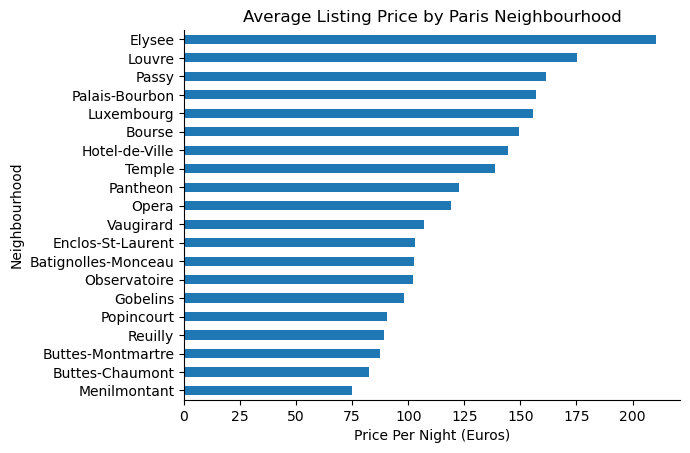

In [67]:
import seaborn as sns

(paris_listings_neighbourhood
 .plot
 .barh(
    title = "Average Listing Price by Paris Neighbourhood",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Neighbourhood",
     legend=None
    )
)

sns.despine()

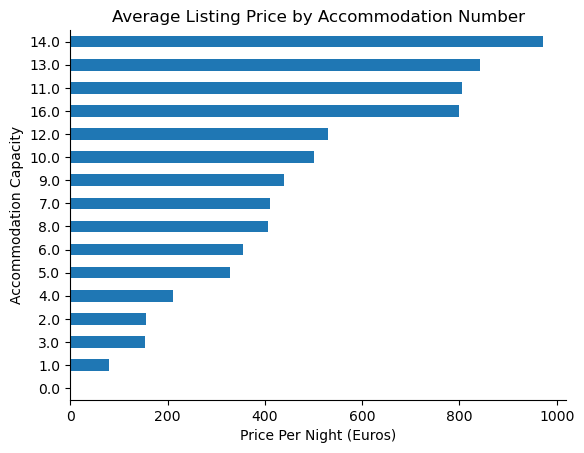

In [71]:
import seaborn as sns

(paris_listings_accommodates
 .plot
 .barh(
    title = "Average Listing Price by Accommodation Number",
     xlabel = "Price Per Night (Euros)",
     ylabel = "Accommodation Capacity",
     legend=None
    )
)

sns.despine()

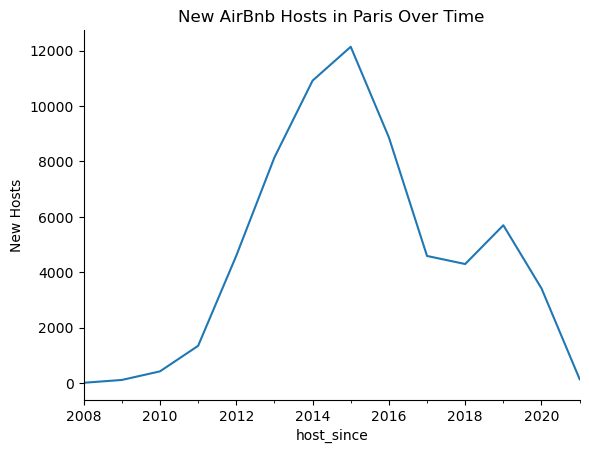

In [75]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New Airbnb Hosts in Paris Over Time"

)

sns.despine()

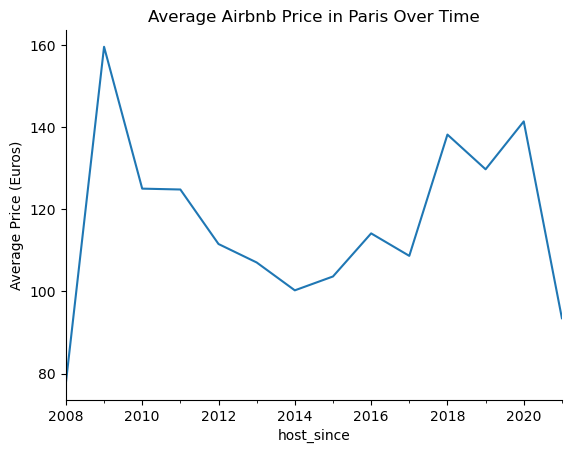

In [77]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average Airbnb Price in Paris Over Time"

)

sns.despine()

Text(0, 0.5, 'Average Price')

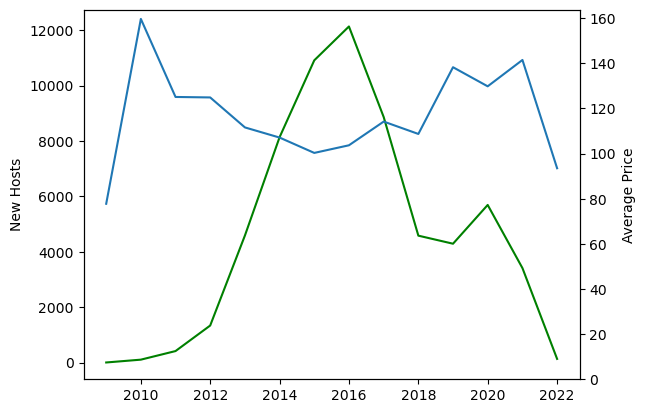

In [87]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="green"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)
ax2.set_ylim(0)

ax2.set_ylabel("Average Price")